In [27]:
!pip install kagglehub
!pip install kaggle

In [8]:
import pandas as pd
hotels = pd.read_csv("../data/raw/train.csv")
hotels.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [9]:
# summary of the data
hotels.describe()
# information about the data
hotels.info()
# check for missing values
hotels.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_time                  object 
 1   site_name                  int64  
 2   posa_continent             int64  
 3   user_location_country      int64  
 4   user_location_region       int64  
 5   user_location_city         int64  
 6   orig_destination_distance  float64
 7   user_id                    int64  
 8   is_mobile                  int64  
 9   is_package                 int64  
 10  channel                    int64  
 11  srch_ci                    object 
 12  srch_co                    object 
 13  srch_adults_cnt            int64  
 14  srch_children_cnt          int64  
 15  srch_rm_cnt                int64  
 16  srch_destination_id        int64  
 17  srch_destination_type_id   int64  
 18  is_booking                 int64  
 19  cnt                        int64  
 20  

date_time                           0
site_name                           0
posa_continent                      0
user_location_country               0
user_location_region                0
user_location_city                  0
orig_destination_distance    13525001
user_id                             0
is_mobile                           0
is_package                          0
channel                             0
srch_ci                         47083
srch_co                         47084
srch_adults_cnt                     0
srch_children_cnt                   0
srch_rm_cnt                         0
srch_destination_id                 0
srch_destination_type_id            0
is_booking                          0
cnt                                 0
hotel_continent                     0
hotel_country                       0
hotel_market                        0
hotel_cluster                       0
dtype: int64

In [12]:
# distribution of the of hotel_continent
print(hotels['hotel_continent'].value_counts())
# distribution of the of hotel_country
print(hotels['hotel_country'].value_counts())



hotel_continent
2    19777647
6     7572044
3     4895159
4     4339118
0      712270
5      373841
1         214
Name: count, dtype: int64
hotel_country
50     18015006
8       1914010
198     1762641
105     1350403
70      1199342
         ...   
85           11
62            8
90            4
175           3
172           1
Name: count, Length: 213, dtype: int64


In [15]:
hotels['date_time'] = pd.to_datetime(hotels['date_time'])
hotels['date'] = hotels['date_time'].dt.date
hotels['hour'] = hotels['date_time'].dt.hour

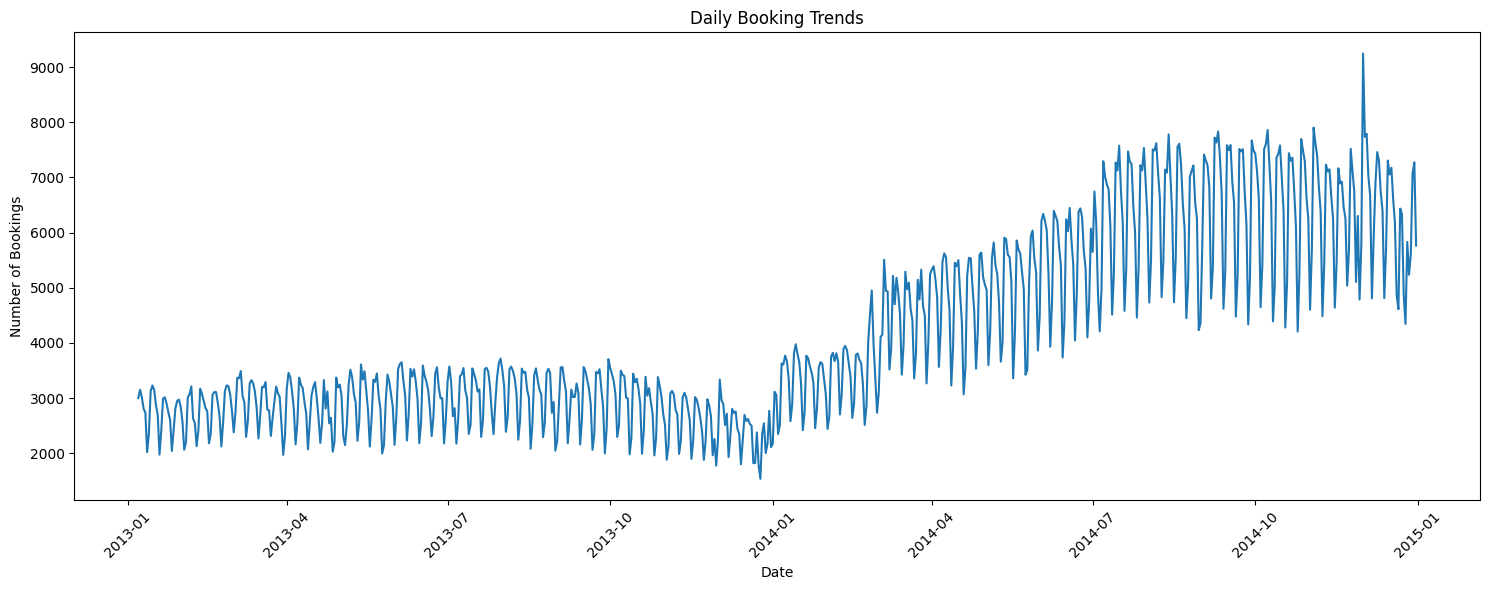

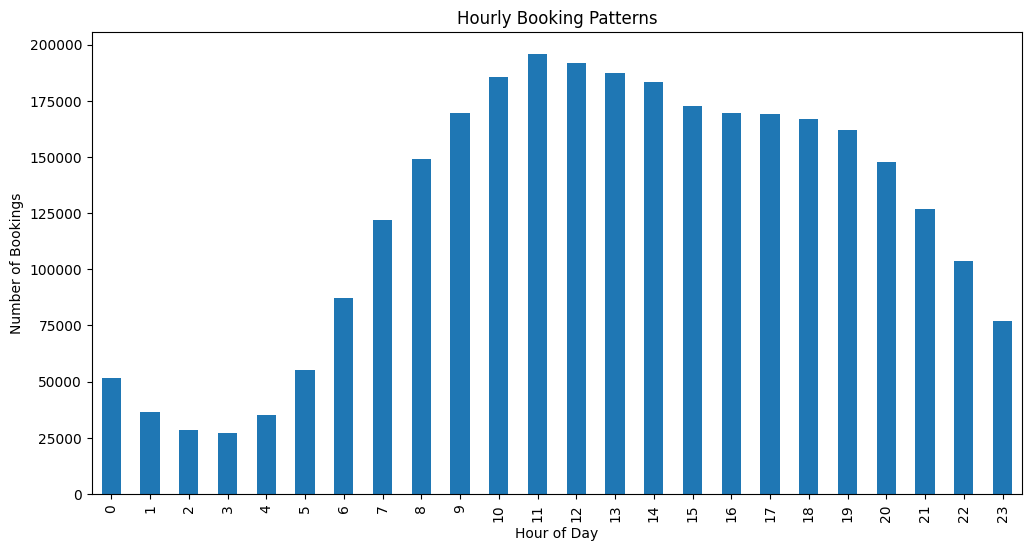

In [17]:
# daily booking trends
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
daily_bookings = hotels.groupby('date')['is_booking'].sum()
daily_bookings.plot()
plt.title('Daily Booking Trends')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot hourly booking patterns
plt.figure(figsize=(12, 6))
hourly_bookings = hotels.groupby('hour')['is_booking'].sum()
hourly_bookings.plot(kind='bar')
plt.title('Hourly Booking Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bookings')
plt.show()

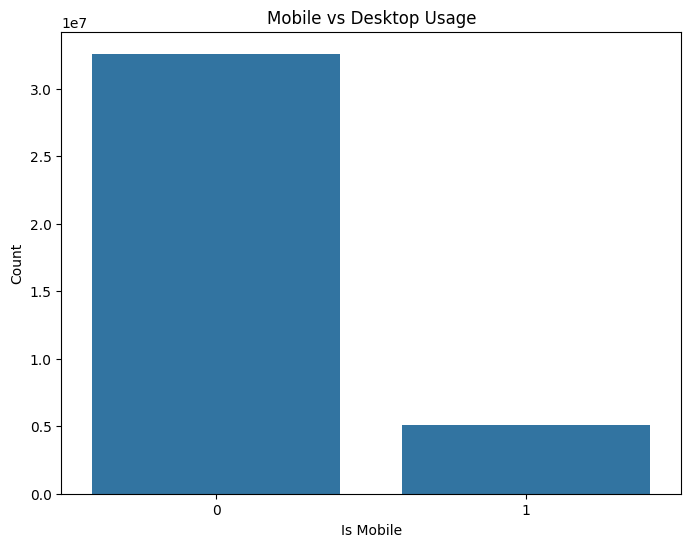

In [18]:
import seaborn as sns
# Mobile vs Desktop usage
plt.figure(figsize=(8, 6))
sns.countplot(x='is_mobile', data=hotels)
plt.title('Mobile vs Desktop Usage')
plt.xlabel('Is Mobile')
plt.ylabel('Count')
plt.show()

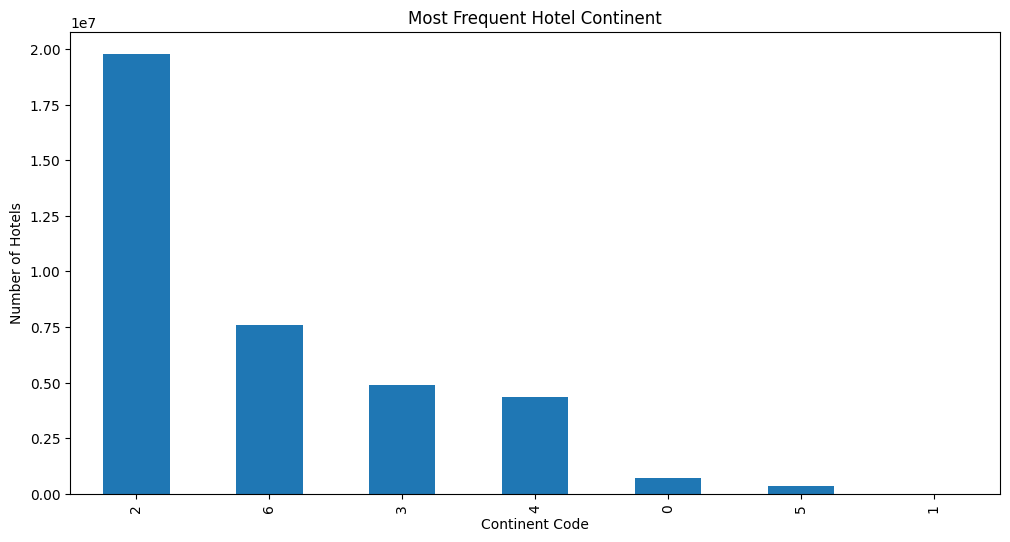

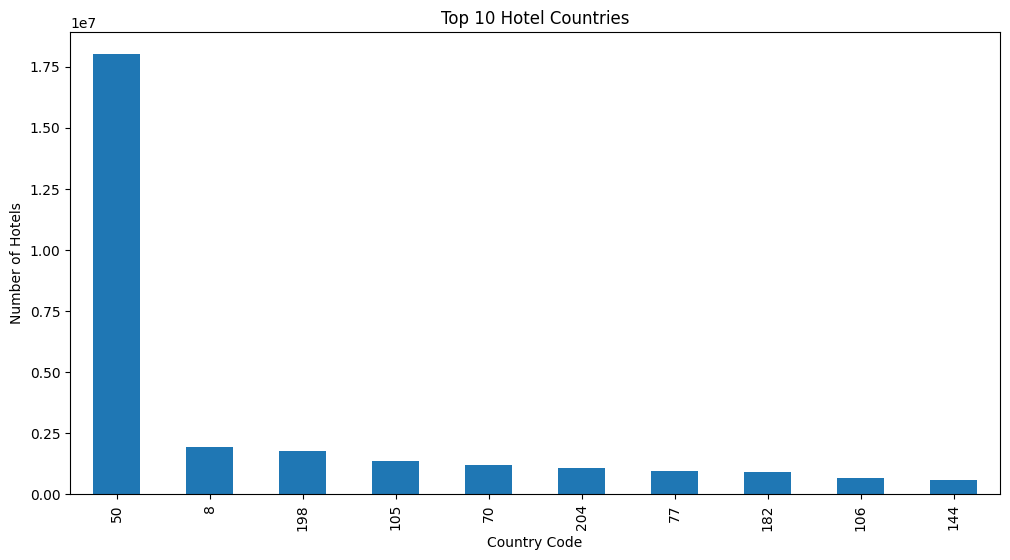

Text(0, 0.5, 'Number of Hotels')

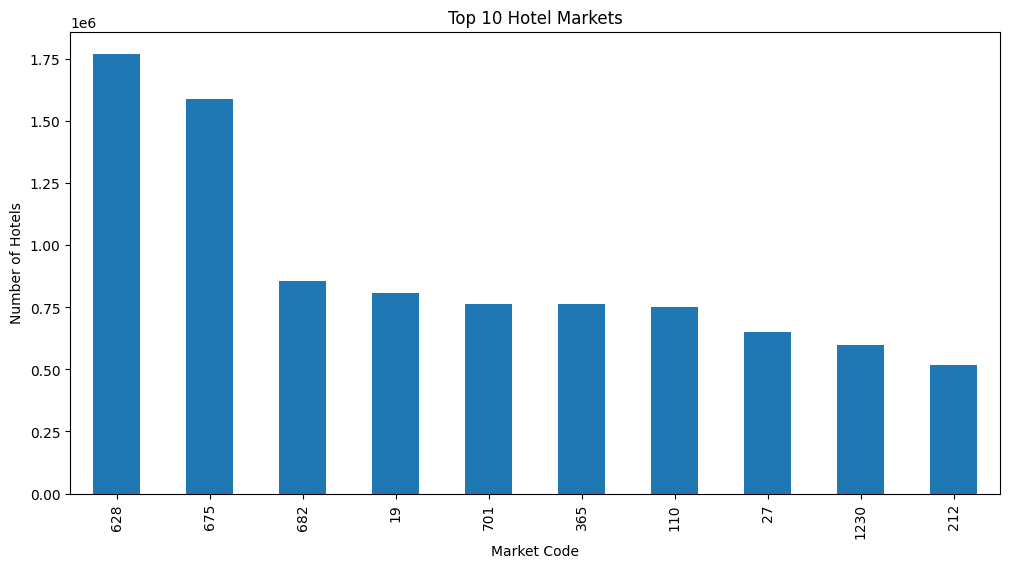

In [20]:
# most frequent hotel continent
plt.figure(figsize=(12, 6))
hotels['hotel_continent'].value_counts().plot(kind='bar')
plt.title('Most Frequent Hotel Continent')
plt.xlabel('Continent Code')
plt.ylabel('Number of Hotels')
plt.show()
# top 10 hotel countries
plt.figure(figsize=(12, 6))
hotels['hotel_country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Hotel Countries')
plt.xlabel('Country Code')
plt.ylabel('Number of Hotels')
plt.show()
# top 10 hotel markets
plt.figure(figsize=(12, 6))
hotels['hotel_market'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Hotel Markets')
plt.xlabel('Market Code')
plt.ylabel('Number of Hotels')

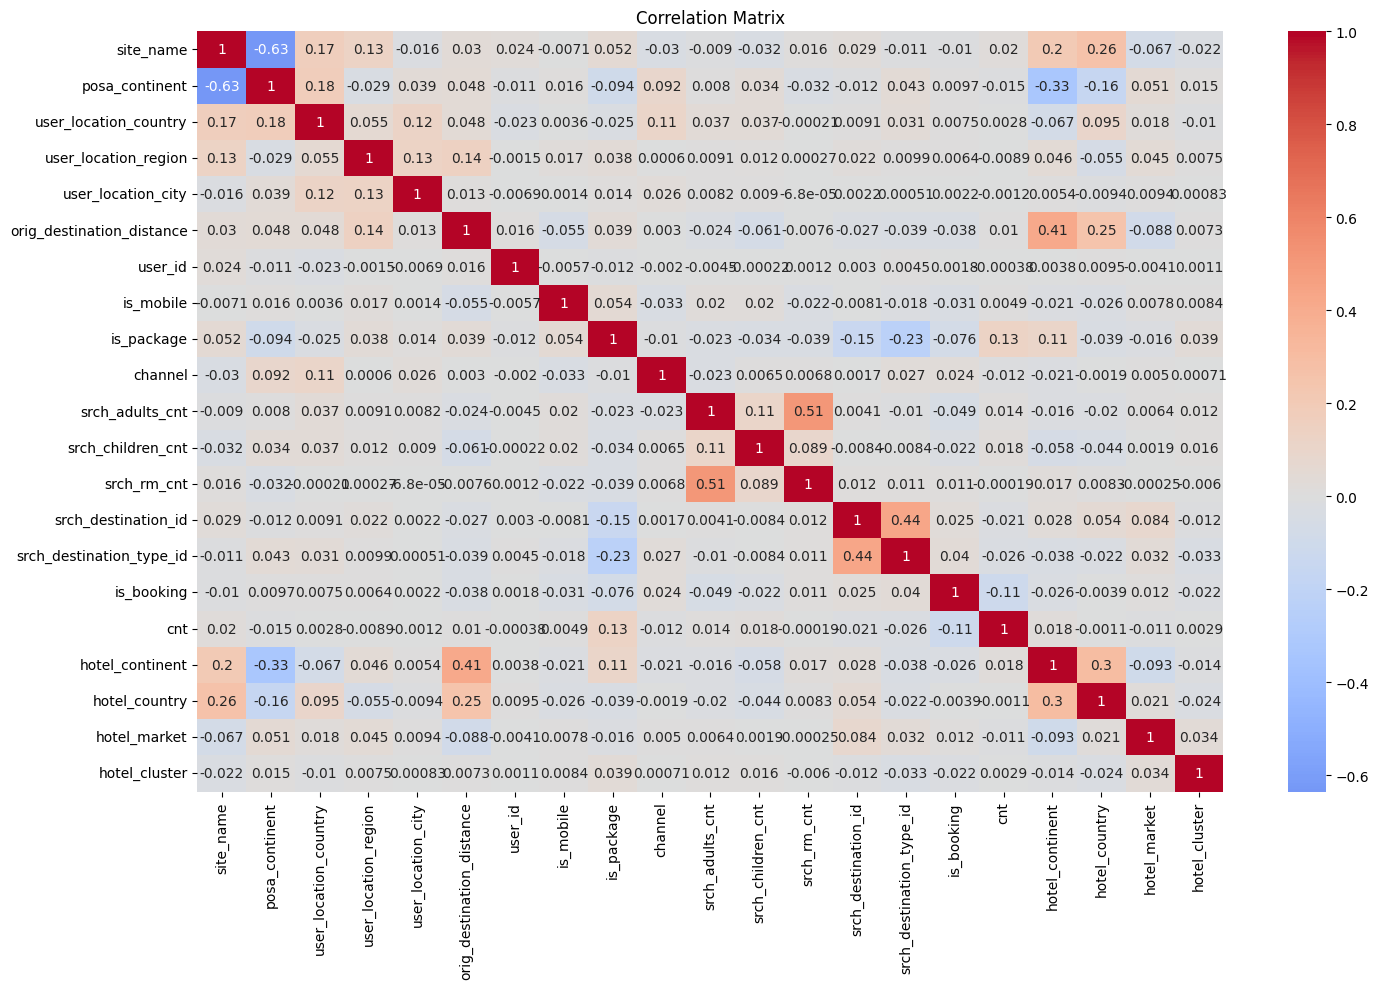

In [22]:
# correlation matrix
numeric_cols = hotels.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = hotels[numeric_cols].corr()


plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


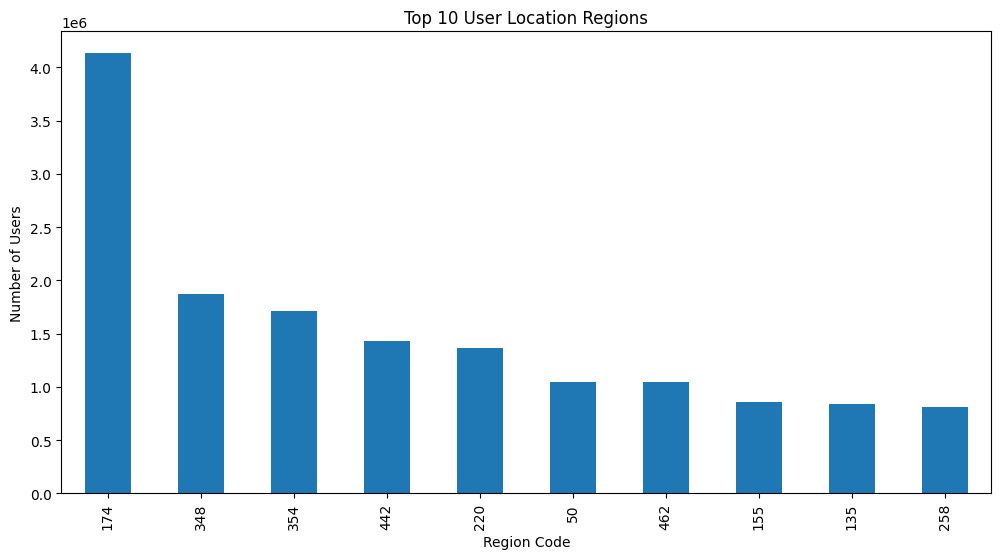

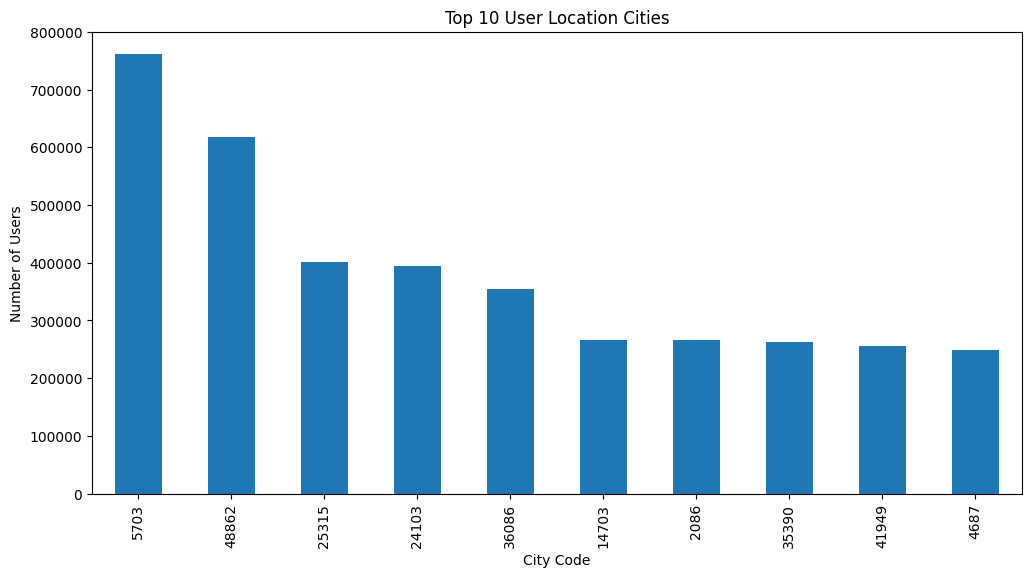

In [24]:
# user_location_region
plt.figure(figsize=(12, 6))
hotels['user_location_region'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 User Location Regions')
plt.xlabel('Region Code')
plt.ylabel('Number of Users')
plt.show()  
# user_location_city
plt.figure(figsize=(12, 6))
hotels['user_location_city'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 User Location Cities')
plt.xlabel('City Code')
plt.ylabel('Number of Users')
plt.show()

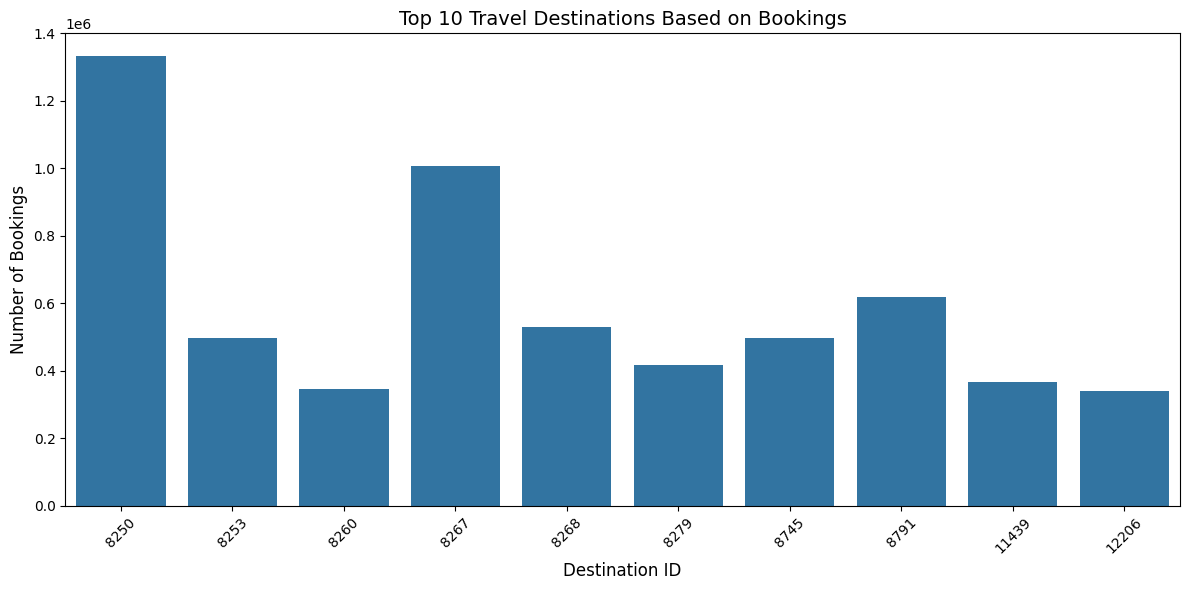

In [26]:
destination_counts = hotels['srch_destination_id'].value_counts().head(10)  # Top 10 destinations

# Plotting the top 10 most popular destinations
plt.figure(figsize=(12, 6))
sns.barplot(x=destination_counts.index, y=destination_counts.values)
plt.title('Top 10 Travel Destinations Based on Bookings', fontsize=14)
plt.xlabel('Destination ID', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

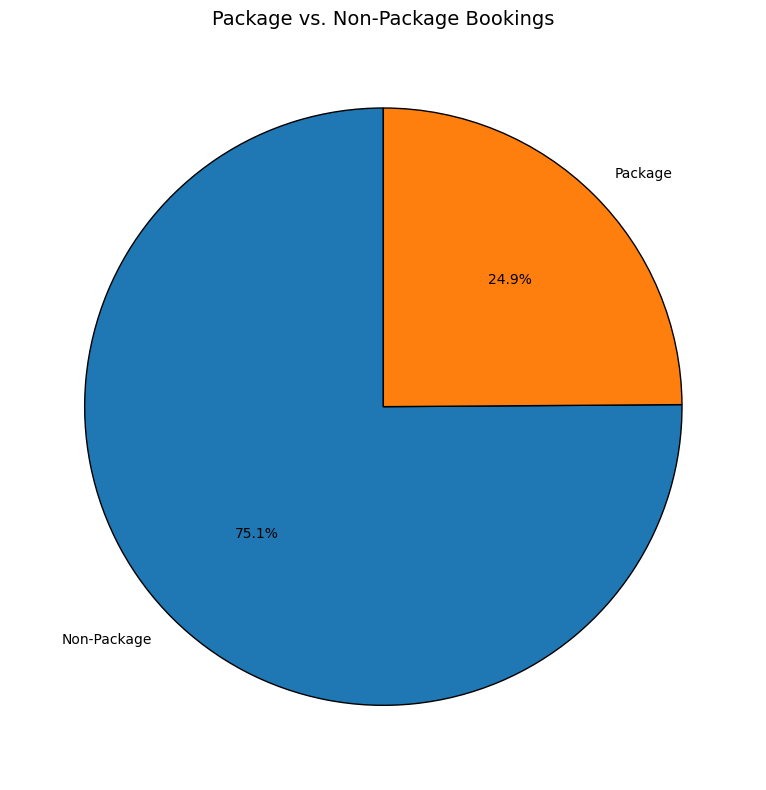

In [27]:
# package vs non-package bookings
package_booking_counts = hotels['is_package'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(package_booking_counts, labels=['Non-Package', 'Package'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Package vs. Non-Package Bookings', fontsize=14)
plt.tight_layout()
plt.show()

In [28]:
#load the test data
test_data = pd.read_csv("../data/raw/test.csv")
test_data.head()




,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [33]:
# check columns in test data
train_data = pd.read_csv("../data/raw/train.csv")
print(train_data.columns)
print(test_data.columns)

# check which columns are in train data but not in test data
print(set(train_data.columns) - set(test_data.columns))
#


Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')
Index(['id', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'hotel_continent', 'hotel_country', 'hotel_market'],
      dtype='object')
{'is_booking', 'hotel_cluster', 'cnt'}
